In [1]:
# 텐서플로,케라스 cpu, gpu 선택을 위해 지원되는 디바이스 넘보 보기
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14911310371002283697, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4739593145827810736
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8301143783867215399
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16258622831274683792
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
# clear_output() 으로 반복문에서 길~게 나오는 로그들을 매 루프마다 지우고 새로 출력하게 한다
from IPython.display import clear_output 

# InteractiveShell 옵션에 'all'을 주면 주피터노트북의 각 셀에서 가장 마지막 줄 뿐만 아니라, 출력하도록 한 모든 값이 출력됨
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 경고가 너무 많이뜨는경우 주피터가 죽기때문에 경고메세지는 무시하도록 설정
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# Matplotlib을 시각화 모듈로 사용하지만, plot의 기본 스타일은 seaborn의 스타일을 따르도록 한다
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

# pandas 데이터프레임이 너무 긴~경우 가로, 세로 몇 줄까지 보여줄 것인지 설정
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)


In [3]:
# colab에서의 한글 폰트 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


# # matplotlib 모듈에 한글폰트 적용
# from matplotlib import font_manager, rc
# font_name = 'AppleGothic'
# rc('font', family=font_name)

# # matplotlib에서 한글 사용 시, 마이너스 기호의 폰트가 깨지는 문제를 해결하는 설정
# mpl.rcParams['axes.unicode_minus'] = False

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [0]:
 import os

def getImageFromPath(path):
    x_dir_ls = []
    img_file = []
    y_list = []
    # count = 0

    for root, dirs, files in os.walk(path):
        for fname in files:
            full_fname = os.path.join(root, fname)
            # print(full_fname)
            x_dir_ls.append(full_fname)
            img_file.append(fname)
            y_list.append(fname.split("_")[0]) # 웹툰 제목을 y값인 라벨로 설정함(Y값은 파일명의 _앞에 위치한 웹툰 이름임)
            # count += 1 
            # if count == 2716:
            #   break

    # clear_output()        
    print("All image path listing complete!")
    return x_dir_ls, img_file, y_list # 각 이미지들의 경로, 이미지 파일명, y값 리스트 

# 실행예시
# path = 'D:/0_webtoon_imgs/test_dir_2'
# x_dir_ls, img_file, y_list = getImageFromPath(path)

In [5]:
from PIL import Image as pil

x_dir_ls = []
img_file = []
y_list = []

for root, dirs, files in os.walk('/content/drive/My Drive/total_img'):
    for fname in files:
        full_fname = os.path.join(root, fname)
        # print(full_fname)
        x_dir_ls.append(full_fname)
        img_file.append(fname)
        y_list.append(fname.split("_")[0]) # 웹툰 제목을 y값인 라벨로 설정함(Y값은 파일명의 _앞에 위치한 웹툰 이름임)
        break
    break
# clear_output()        
print("All image path listing complete!")
# return x_dir_ls, img_file, y_list # 각 이미지들의 경로, 이미지 파일명, y값 리스트 

# 실행예시
# path = 'D:/0_webtoon_imgs/test_dir_2'
# x_dir_ls, img_file, y_list = getImageFromPath(path)

All image path listing complete!


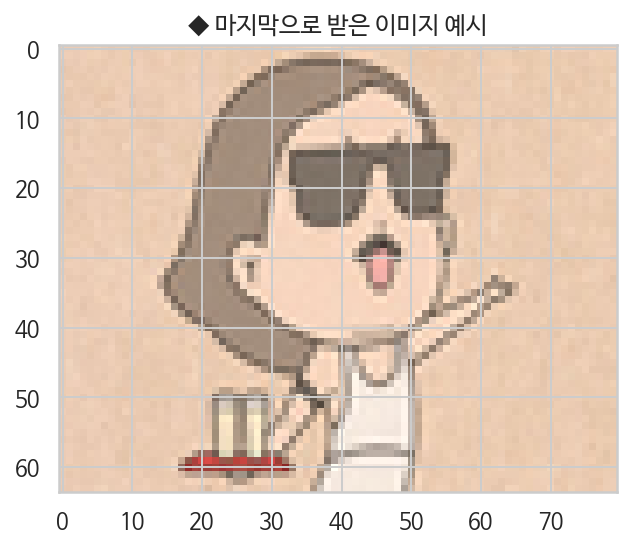

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태 ▽
(1, 64, 80, 3) float32


In [6]:
X_RGBimgs = []
graytoneimgs = []
print("이미지 처리중...")

for i in range(0,len(x_dir_ls)):

    # 미니사이즈로 학습시켜보기 resize로 이미지 크기를 축소시켜서 사용할거임
    a = pil.open(x_dir_ls[i]).resize((80, 64), pil.ANTIALIAS).convert(mode='RGB')
    
    k = np.asarray(a, dtype="uint8")
    
    X_RGBimgs.append(k)
    if i % 150 == 0:
        print(i,"/",len(x_dir_ls)," ==> ",y_list[i], x_dir_ls[i], k.shape, "completed", end='\r')
plt.figure(figsize=(5,5))
plt.imshow(a)
plt.title("◆ 마지막으로 받은 이미지 예시")
clear_output()
plt.show()

X_raw=np.asarray(X_RGBimgs)
X_raw = X_raw.astype('float32')/255.0

print("◆ 이미지 np.array화 완료!",80,"*",64,"--")
print("이미지 데이터 형태 ▽")
print(X_raw.shape, X_raw.dtype)

In [0]:
# X_raw

In [0]:
# 이미지 numpy배열화
from PIL import Image as pil

def imageToNpArray(img_path_ls, v, h, img_mode): # 이미지 path가 리스트로 있어야 가능함
    X_RGBimgs = []
    graytoneimgs = []
    print("이미지 처리중...")

    for i in range(0,len(img_path_ls)):

        # 미니사이즈로 학습시켜보기 resize로 이미지 크기를 축소시켜서 사용할거임
        a = pil.open(img_path_ls[i]).resize((v,h), pil.ANTIALIAS).convert(mode=img_mode)
        
        k = np.asarray(a, dtype="uint8")
        
        X_RGBimgs.append(k)
        if i % 150 == 0:
            print(i,"/",len(img_path_ls)," ==> ",y_list[i], img_path_ls[i], k.shape, "completed", end='\r')
    plt.figure(figsize=(5,5))
    plt.imshow(a)
    plt.title("◆ 마지막으로 받은 이미지 예시")
    clear_output()
    plt.show()

    X_raw=np.asarray(X_RGBimgs)
    X_raw = X_raw.astype('float32')/255.0  # 이거 왜 해야하는걸까?? 
    
    print("◆ 이미지 np.array화 완료!",v,"*",h,"--")
    print("이미지 데이터 형태▽")
    print(X_raw.shape, X_raw.dtype)
    
    return  X_raw, graytoneimgs

In [9]:
import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session

config = tf.compat.v1.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True       # 메모리가 더 필요한 경우 자동 증폭
config.gpu_options.per_process_gpu_memory_fraction = 1.0      # keras의 gpu 메모리 점유율 설정

tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

from keras.utils import np_utils

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



Using TensorFlow backend.


In [14]:
path = '/content/drive/My Drive/total_img_naver/total_img'
x_dir_ls, img_file, y_list = getImageFromPath(path)

All image path listing complete!


In [15]:
print("카테고리 갯수, x_dir갯수, img_file 갯수 : ", len(set(y_list)), len(x_dir_ls), len(img_file))

카테고리 갯수, x_dir갯수, img_file 갯수 :  320 26294 26294


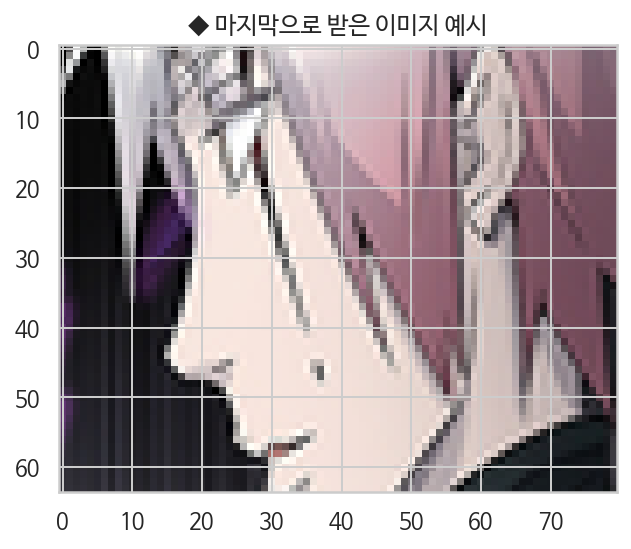

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태▽
(26294, 64, 80, 3) float32


In [14]:
# X_raw, error_imgs = imageToNpArray(x_dir_ls, 80, 64, "RGB") #이미지 path 리스트, 가로px, 세로px, 이미지 모드

In [17]:
# len(X_raw)

26294

In [0]:
# np.save('/content/drive/My Drive/Colab Notebooks/4D_naver_nparray', X_raw)

In [0]:
loaded_array = np.load('/content/drive/My Drive/Colab Notebooks/4D_naver_nparray.npy')

In [17]:
len(loaded_array)

26294

In [0]:
X_raw = loaded_array

In [19]:
print('Y데이터형태')
print("갯수:",len(y_list),"// 카테고리",len(set(y_list)))

Y데이터형태
갯수: 26294 // 카테고리 320


In [20]:
#Y데이터 라벨링하기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = y_list
le.fit(y)
y= le.transform(y)
# y


LabelEncoder()

In [21]:
le.classes_ # 인덱스가 클래명과 대응한다 

array(['11me, 고지애&영재영', '1초, 시니&광운',
       '203호 저승사자, 샤니', '3cm 헌터, 돌연변이',
       '8월의 눈보라, 김리아', '9등급 뒤집기, 아백',
       'FM보이, 육일공', 'Here U Are, D JUN', '가담항설, 랑또',
       '가비지타임, 2사장', '가슴털 로망스, 갸오오',
       '가타부타타, 숭어', '간 떨어지는 동거, 나', '감히, 희나리',
       '갑자기 커피, 우&리지', '갓 오브 하이스쿨, 박용제',
       '갓!김치, 김민우', '갓도령스, 도로롱', '갓물주, HD3',
       '갓핑크, 이상신&국중록', '강남도깨비, 이경민&송준혁',
       '같은도장, 이힝', '개미, 재희', '거미, 모아이',
       '걸어서 30분휴재, 이온도', '검은인간, 이저녁',
       '겟라이프, MOOHAK', '겟백, 세윤', '격기3반, 이학',
       '견우와 선녀, 안수민', '결백한 사람은 없다, 서각',
       '결혼생활 그림일기, 은꼼지', '고래별, 나윤희',
       '고삼무쌍, B급달궁&하마', '고수, 류기운&문정후',
       '고인의 명복, 조주희&유노'

In [0]:
# 트레인 /테스트데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.02, random_state=0)

Y_train = np_utils.to_categorical(y_train, 320)
Y_test = np_utils.to_categorical(y_test, 320)

In [0]:
# X_raw[0].shape

In [0]:
# 2. 그림사이즈 80x64으로 축소시켜서 사용할 것임. 필터수 96개
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()
filter_num = 96

model.add(Conv2D(filter_num, (3, 3), activation='relu', input_shape=(64, 80, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))       # 0.2, 0.3 0.2

model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))       # 0.2, 0.3 0.2

model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))       # 0.3, 0.3 0.4

model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))       # 0.4, 0.4 0.4

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))       # 0.5, 0.3, 0.2
model.add(Dense(320, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 80, 96)        2688      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 80, 96)        83040     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 80, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 40, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 40, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 40, 96)        83040     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 40, 96)       

In [26]:
y_train.shape

(25768,)

In [27]:
Y_train.shape

(25768, 320)

In [28]:
from keras.preprocessing.image import ImageDataGenerator

# 오그멘테이션 자료 set 만들기
print('Using Full Set augmented data')
train_generator = ImageDataGenerator(
    zoom_range=0.05,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True)

train_generator.fit(X_train)

train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

N = 5 #오그멘테이션 할 배수
print("total N : ",N)

X_train_new = []
Y_train_new = []
for i in range(N):
    print("generating...",i,end="... ")
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    print("1/2..",end=" ")
    Y_train_new.append(y_train_new)
    print("ok!!")
    
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

clear_output()
print("All data are Generated!!")
X_train_new.shape

All data are Generated!!


(128840, 64, 80, 3)

In [29]:
# X_train_new[0].shape

(64, 80, 3)

In [30]:
model.fit(X_train_new, Y_train_new, epochs=1, batch_size=64, validation_data=(X_test, Y_test), verbose=1)

Train on 128840 samples, validate on 526 samples
Epoch 1/1
128840/128840 [==============================] - 148s 1ms/step - loss: 6.4395 - accuracy: 0.1153 - val_loss: 4.6809 - val_accuracy: 0.1521


In [0]:
%%time
#오그멘테이션 없이 학습하고자 할 경우
# hist = model.fit(X_train, Y_train, epochs=3, batch_size=50, validation_data=(X_test, Y_test), verbose=1)

CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 6.44 µs


In [0]:
#### 학습한 신경망모델 저장하기
# model.save("wbt_tmb_test2-1(epoch_500)_BN_3x3_acc_65_vacc_41.hdf5")

# model.save("/content/drive/My Drive/Colab Notebooks/naver_img_model.h5")

In [0]:
# 저장한 모델 불러오기
# from keras.models import load_model

model = load_model("/content/drive/My Drive/Colab Notebooks/naver_img_model.h5")

In [0]:
# 테스트 데이터 보기
from sklearn.metrics import *
# X_test.shape
# V_raw.shape
y_pred = model.predict(X_test,verbose=0)
# print(y_pred)

In [33]:
len(y_pred[0])

320

In [34]:
?# inverse_transform은 수치화된 라벨값에 대응하는 원래의 라벨 명칭을 반환한다
label_Y = le.inverse_transform(y_test)
# result_df = pd.DataFrame([label_Y,y_test[0:50]],columns=['real_wbt_id','Y_val'])
result_df = pd.DataFrame()

# 원래의 y 카테고리 명칭
result_df['id']=label_Y

# 라벨인코더로 수치화시킨 y값
result_df['Y_val']=y_test

result_df = pd.concat([result_df,pd.DataFrame(y_pred)],axis=1)
clear_output()
result_df.tail()
print("테스트 데이터 갯수 : ", y_test.size)
print("(테스트 데이터 갯수, 카테고리 갯수) : ", y_pred.shape)

,id,Y_val,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319
521,"세상은 돈과 권력, 한동우&이도희",152,0.000033,0.006667,0.002629,0.003418,0.001617,0.000269,0.000363,0.003341,0.004454,0.000736,0.002704,0.000690,0.003305,0.008634,1.097993e-04,0.007989,0.003408,0.001616,0.002779,0.002394,0.001707,0.012369,0.000132,0.002264,0.001393,0.002437,0.002357,0.007496,0.002959,0.000533,0.000362,1.687968e-05,0.001042,0.003102,0.005525,0.009796,0.004182,0.003275,0.001642,0.004528,0.002247,0.001025,0.012619,0.000791,0.001706,0.008532,0.000738,0.001960,0.003869,0.004374,0.003205,0.004331,0.000863,0.000293,0.006760,0.000352,0.000335,0.001893,0.000558,0.005421,0.003348,0.000100,0.001987,0.000477,0.011255,0.005249,0.002569,0.005617,0.001450,0.000273,0.000270,1.030039e-04,0.000238,0.006031,0.017269,0.013026,0.005115,0.001210,0.000838,0.001478,0.000998,0.001675,0.013847,0.000668,0.003271,2.006224e-05,0.002129,0.006329,0.000621,0.001405,0.001453,0.000372,0.000439,0.000156,0.001422,0.009319,0.000684,0.007988,...,0.002032,0.004889,0.000446,0.001502,0.019202,0.000717,0.000884,0.006571,0.001190,0.002227,0.004427,0.001285,0.002565,0.001726,0.007860,0.001300,0.002282,0.000429,0.003096,0.004371,0.001148,0.002797,0.003180,0.000659,0.001806,0.001567,0.003552,0.001472,0.006919,0.002851,0.000743,0.000800,0.005913,0.000962,0.003496,0.000051,0.000359,0.001018,0.002040,0.001251,0.000119,0.002208,0.000235,0.001136,0.000315,0.002801,0.004125,0.007401,0.014074,0.002157,0.000880,0.001292,0.004616,0.002780,0.006874,0.004413,0.001630,0.004443,0.001664,0.001050,0.004278,1.783891e-05,0.000085,0.012602,0.009406,0.002455,0.003137,0.002349,0.004115,0.004207,0.007969,0.000546,0.001293,0.004219,0.000099,0.004484,0.000688,0.000630,0.003421,0.002830,0.004352,0.000314,0.000133,0.002084,0.001861,0.002351,0.003024,0.000494,0.001474,0.001195,0.007198,0.007371,0.008442,0.001788,0.000676,0.000891,0.001653,0.002641,0.002894,0.026286
522,"마음의소리, 조석",106,0.003622,0.002568,0.004648,0.000755,0.001317,0.000461,0.000874,0.001896,0.011403,0.000715,0.003079,0.001101,0.003811,0.000472,5.413302e-05,0.014734,0.001225,0.002012,0.009286,0.009524,0.001742,0.002127,0.000954,0.000897,0.005492,0.001812,0.000406,0.001296,0.001820,0.000405,0.000037,1.361637e-04,0.000646,0.004359,0.008776,0.003543,0.003485,0.004196,0.001549,0.001505,0.001473,0.001486,0.001710,0.000297,0.001479,0.009726,0.000677,0.003928,0.001561,0.002200,0.000702,0.001621,0.002986,0.001628,0.002306,0.000406,0.001097,0.005082,0.000547,0.011338,0.003656,0.000063,0.001573,0.000156,0.003450,0.006844,0.001496,0.014562,0.007289,0.000122,0.000281,1.089869e-04,0.000221,0.006559,0.014352,0.006500,0.000870,0.002464,0.001613,0.002546,0.001513,0.000817,0.016320,0.000599,0.005681,5.194468e-05,0.001385,0.012776,0.002535,0.000064,0.004356,0.000523,0.000403,0.000279,0.003348,0.002613,0.000302,0.010970,...,0.001107,0.002175,0.000503,0.002470,0.012953,0.001556,0.003336,0.005528,0.002245,0.011482,0.009524,0.001919,0.002350,0.001638,0.007283,0.007548,0.001747,0.000970,0.001487,0.005281,0.007808,0.002351,0.002592,0.003034,0.004224,0.000540,0.001479,0.001519,0.001351,0.009177,0.006195,0.001966,0.005640,0.001784,0.003860,0.000237,0.001575,0.000953,0.002212,0.001970,0.000062,0.003602,0.000455,0.001211,0.000490,0.003417,0.000651,0.017639,0.009848,0.000206,0.000530,0.002149,0.001388,0.001413,0.007134,0.003968,0.000810,0.0

테스트 데이터 갯수 :  526
(테스트 데이터 갯수, 카테고리 갯수) :  (526, 320)


In [36]:
np.sum(result_df.iloc[3][2:])

1.0000001

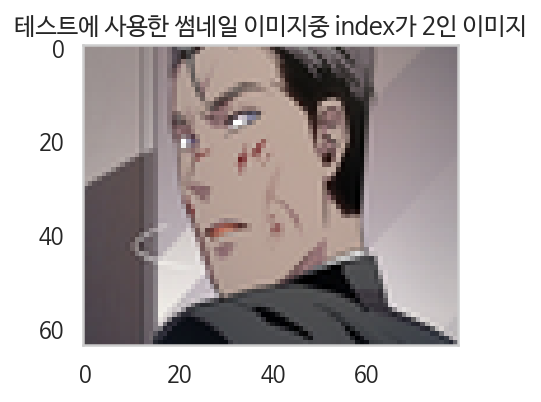

In [44]:
#직접 눈으로 비교할 label숫자 설정
find_i = 521  # X_test index => 521 (세상은 돈과 권력)

# X_test
test_img = X_test[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(14,16))
plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = '테스트에 사용한 썸네일 이미지중 index가 2인 이미지'
plt.title(info2)
clear_output()
plt.show()


In [45]:
# X_test의 find_i에 해당하는 이미지의 각 카테고고리(라벨)에 속할 확률값들을 가져온다
finded = result_df.iloc[find_i,2:]

temp = pd.DataFrame()

# finded 의 인덱스는 각 카테고리 명칭을 수치화 한 숫자들이니까, 이걸 다시 기존 웹툰 제목으로 바꾼다
temp["id"] = le.inverse_transform(list(finded.index))

# 이 각 웹툰에 현재 선택한 이미지인 X_test[find_i]가 속할 확률을 데이터프레임으로 만든거임
temp["proba"] = finded
top10_df = temp.sort_values('proba', ascending=False).head(10)
top10_df

,id,proba
319,"히어로메이커, 빤쓰",0.026286
214,"외모지상주의, 박태준",0.0218367
224,"윈드브레이커, 조용석",0.0192018
171,"신의 탑, SIU",0.0188823
74,"다이스(DICE), 윤현석",0.0172687
268,"취사병 전설이 되다, 제이로빈&이진수",0.014074
82,"더 게이머, 성상영&상아",0.0138468
147,"사이드킥 2~3휴재, 신의철",0.0135423
187,"어글리후드, 미애",0.0135089
75,"닥터 프로스트 시즌 3~4, 이종범",0.0130257


In [0]:
# top10에 해당하는 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re

top10_path_list = []
title_list = []

for idx, row in top10_df.iterrows():  
  title_list.append(row['id'])
  title = row['id'][:5]      # 웹툰 제목에 특수문자, 괄호 등이 들어간 경우 이런식으로 제목 뽑아내기
  regex = re.compile('/content/drive/My Drive/total_img_naver/total_img/' + title + '.{0,}')

  for each_dir in x_dir_ls:
    # print(each_dir)
    matched_path = regex.findall(each_dir)
    
    # break
    if len(matched_path) != 0:
      break

  top10_path_list.append(matched_path[0])

In [123]:
title

'다이스(DICE), 윤현석'

In [129]:
top10_path_list

['/content/drive/My Drive/total_img_naver/total_img/히어로메이커, 빤쓰_히어로메이커 49화 <습격>.png',
 '/content/drive/My Drive/total_img_naver/total_img/외모지상주의, 박태준_280화 호스텔 [11].png',
 '/content/drive/My Drive/total_img_naver/total_img/위험한 신입사원, 박수정&Jiya_35화.png',
 '/content/drive/My Drive/total_img_naver/total_img/신상 미스터리 극장, 신상윤_4화 - 초고액 알바 (2) end..png',
 '/content/drive/My Drive/total_img_naver/total_img/닥터앤닥터 육아일기, 닥터베르_72. 복직 3.png',
 '/content/drive/My Drive/total_img_naver/total_img/취사병 전설이 되다, 제이로빈&이진수_53화 : 자연산과 양식.png',
 '/content/drive/My Drive/total_img_naver/total_img/더 게이머, 성상영&상아_4부 36화.png',
 '/content/drive/My Drive/total_img_naver/total_img/사우러스, 이노_51화.png',
 '/content/drive/My Drive/total_img_naver/total_img/어른의 계절, 선홍달_11화 이상.png',
 '/content/drive/My Drive/total_img_naver/total_img/닥터앤닥터 육아일기,

In [0]:
# top10_path_list

In [132]:
title_list

['히어로메이커, 빤쓰',
 '외모지상주의, 박태준',
 '윈드브레이커, 조용석',
 '신의 탑, SIU',
 '다이스(DICE), 윤현석',
 '취사병 전설이 되다, 제이로빈&이진수',
 '더 게이머, 성상영&상아',
 '사이드킥 2~3휴재, 신의철',
 '어글리후드, 미애',
 '닥터 프로스트 시즌 3~4, 이종범']

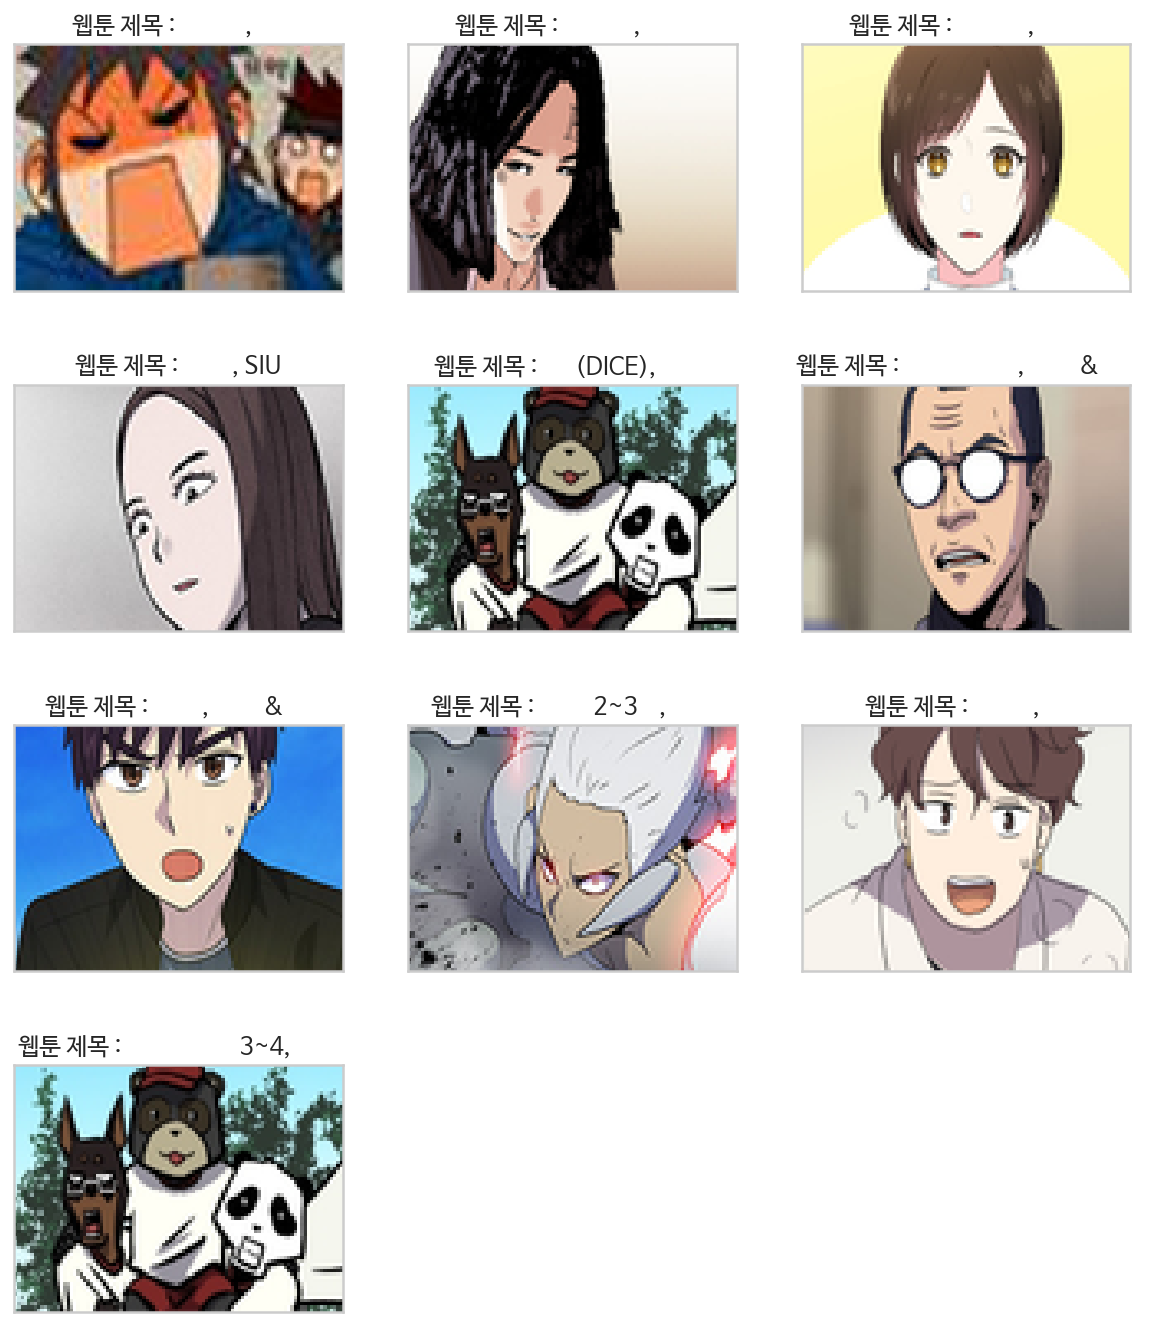

In [131]:
# proba기준 테스트에 사용한 썸네일 이미지와 가장 유사한 상위 10개웹툰 나열 --------------------------

i = 0

plt.figure(figsize=(10,12))
for each_path in top10_path_list:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  info = str(title_list[i])
  plt.title('웹툰 제목 : ' + info, fontsize='medium')
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()

**다른 플랫폼의 웹툰 이미지를 가져와서 비슷한 그림체 뽑아보기**


In [133]:
# 네이버 이미지 갖고와서 predict해보기

test_path = '/content/drive/My Drive/test_img/'
v_dir_ls, v_img_file, v_list = getImageFromPath(test_path)

All image path listing complete!


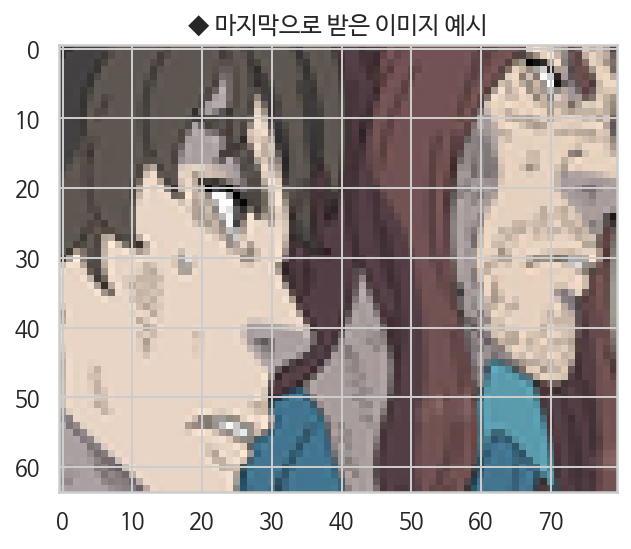

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태▽
(6, 64, 80, 3) float32


In [134]:
V_raw, v_error_imgs = imageToNpArray(v_dir_ls,80,64,"RGB")       # 이미지 path 리스트, 가로px, 세로px, 이미지 모드

In [0]:
# 미리 트레이닝 시켜둔 예측모델 불러오기
# from keras.models import load_model

# model = load_model("/content/drive/My Drive/Colab Notebooks/daum_thumbnail_model.h5")

In [135]:
# 직접 이미지를 분류모델에 넣어서 proba값 확인

y_pred = model.predict(V_raw, verbose=1)
# print(y_pred)

6/6 [==============================] - 0s 9ms/step


In [0]:
label_Y = le.inverse_transform(y_test)

In [137]:
result_df = pd.DataFrame()
result_df['id'] = v_img_file
# result_df['Y_val']=y_test
result_df = pd.concat([result_df, pd.DataFrame(y_pred)],axis=1)
clear_output()
# result_df.tail(10)
# y_test.size
y_pred.shape
print('id목록\n', result_df.id.unique())

(6, 320)

id목록
 ['별똥별이 떨어지는 그 곳에서 기다려_2부 1화.png'
 '블랙 베히모스_60화.png' '아비무쌍_63화.png'
 '아싸가 알아버렸다_10화.png' '여의주_시즌2 15화.png'
 '인간을 먹는 성_82화.png']


In [138]:
result_df

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319
0,별똥별이 떨어지는 그 곳에서 기다려_2부 1...,3.493024e-06,0.002319,0.002329,1.388662e-03,0.005275,0.000228,0.000205,0.006746,0.006363,0.005477,0.001482,0.002655,0.007875,0.003251,4.770362e-06,0.010742,0.001953,0.000850,0.001169,0.001353,0.001146,0.002940,2.601931e-05,2.454447e-04,0.008716,0.004931,0.004319,0.001361,0.003690,0.000118,2.272672e-05,1.423702e-06,0.001480,0.000664,0.001806,0.006585,0.009436,0.002094,0.001177,0.001947,2.128955e-04,0.001622,0.002799,0.001864,0.002523,0.010575,0.000764,0.000573,0.000853,0.002351,3.993683e-03,5.979498e-04,0.000469,0.000064,0.002769,0.000020,0.000553,0.001934,0.000575,0.007473,0.002142,1.370436e-04,5.133092e-04,9.452549e-04,0.097756,0.000698,0.005479,0.003536,0.001323,1.983897e-03,3.047358e-05,0.000037,0.000177,0.003441,0.010861,0.005862,2.662538e-03,0.000402,0.000569,0.000026,0.000160,0.004914,0.015316,0.000276,0.000867,2.926633e-06,0.000214,0.000746,0.000105,7.667272e-05,0.000345,0.001311,0.000110,0.000044,0.000268,0.007232,0.001061,0.008229,0.000293,...,0.001758,0.004132,0.000410,0.000423,0.008700,0.000785,0.001501,0.009337,0.008352,0.003227,0.007983,0.000366,0.001979,0.002583,0.000875,0.000131,0.000381,0.000724,0.004138,0.003647,0.001161,0.002056,0.004659,0.000131,0.000412,0.001830,0.002026,0.000431,0.022801,0.000654,0.000217,0.000175,0.003753,0.000270,0.004107,0.000016,2.209916e-04,0.000908,0.000694,0.000207,1.632399e-04,0.001540,0.000103,0.003108,0.001428,0.000631,0.007707,0.001948,0.001399,5.308336e-03,0.003490,0.001782,0.000383,8.442969e-04,0.017650,0.007534,0.001073,0.008865,0.001433,0.000415,0.002370,8.971163e-07,1.401116e-05,0.007464,0.021811,0.003367,0.000676,0.003277,0.007206,0.010377,0.023054,0.000202,0.001009,0.001117,0.000033,0.000983,0.000049,0.000430,0.001644,0.001856,0.002877,3.997843e-05,0.000243,0.002080,0.001557,0.000505,0.001216,0.000049,0.000438,7.939351e-05,0.003868,0.006005,0.006877,0.000340,0.004559,0.000169,0.004866,0.000678,0.001246,0.008040
1,블랙 베히모스_60화.png,3.732169e-05,0.004780,0.002994,1.589543e-04,0.000983,0.000150,0.000034,0.000310,0.006978,0.000713,0.001244,0.000080,0.009345,0.000105,5.968634e-07,0.039247,0.001321,0.001238,0.003909,0.001809,0.000258,0.001520,4.229957e-06,7.300026e-05,0.008189,0.003579,0.000270,0.002297,0.001487,0.000835,1.815985e-06,8.439284e-07,0.000525,0.000424,0.000226,0.002269,0.003712,0.004132,0.000833,0.000350,8.358175e-05,0.000508,0.000177,0.000121,0.000169,0.001767,0.000063,0.001006,0.000168,0.004714,2.669779e-04,1.548953e-05,0.001243,0.000041,0.000384,0.000029,0.000252,0.000820,0.000068,0.012945,0.000521,4.584309e-07,3.928340e-05,1.524911e-05,0.003799,0.002032,0.001251,0.007703,0.003047,1.537546e-05,6.962509e-05,0.000007,0.000113,0.018218,0.005957,0.006634,6.479083e-05,0.000356,0.002247,0.000132,0.000209,0.001323,0.017736,0.000510,0.000361,2.691069e-06,0.000147,0.001743,0.000297,1.490993e-06,0.000026,0.002135,0.000010,0.000020,0.002853,0.008587,0.000756,0.005275,0.000264,...,0.001116,0.000480,0.000015,0.007512,0.004683,0.000197,0.001266,0.025820,0.003793,0.006637,0.021162,0.003873,0.000767,0.005054,0.000425,0.000189,0.001354,0.001024,0.000697,0.003602,0.000290,0.006813,0.017218,0.000972,0.000287,0.003263,0.002008,0.000928,0.003346,0.000624,0.000420,0.000376,0.002085,0.000283,0.005873,0.000019,1.315794e-04,0.000336,0.000720,0.000

In [0]:
# le.classes_

In [0]:
#직접 눈으로 비교할 label숫자 설정

find_i = 3        # 3(아싸가 알아버렸다)

# X_test
test_img = V_raw[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

In [0]:
# plt.imshow(test_img)

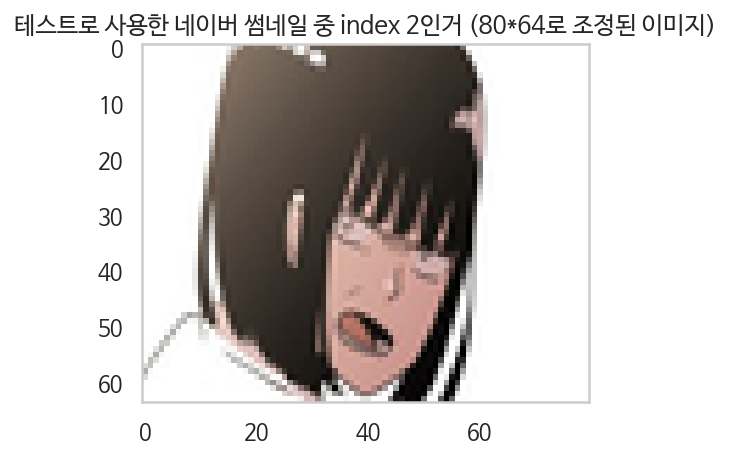

In [146]:
plt.figure(figsize=(4, 6))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = '테스트로 사용한 네이버 썸네일 중 index 2인거 (80*64로 조정된 이미지)'
plt.title(info2)
clear_output()
plt.show()


In [0]:
# 네이버 이미지를 넣었을때, 가장 비슷한 확률값을 가진 웹툰의 이미지 아무거나 10개 가져오기

finded = result_df.iloc[find_i,1:]
temp = pd.DataFrame()
temp["id"] = le.inverse_transform(list(finded.index))
temp["proba"] = finded
top10_df = temp.sort_values('proba', ascending=False).head(10)

In [148]:
top10_df

,id,proba
95,"랜덤채팅의 그녀!, 박은혁",0.0405512
171,"신의 탑, SIU",0.033829
214,"외모지상주의, 박태준",0.0316114
74,"다이스(DICE), 윤현석",0.0285507
194,"에이머, 구동인",0.0262823
64,"나이트런, 김성민",0.0245929
170,"신의 언어, 장래혁",0.0213992
199,"연놈, 상하",0.0211759
227,"유미의 세포들컷툰, 이동건",0.0199476
202,"열렙전사, 김세훈",0.0196617


In [0]:
# top10에 해당하는 다음 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re

top10_path_list = []
title_list = []

for idx, row in top10_df.iterrows():  
  title_list.append(row['id'])
  title = row['id'][:5]        # 웹툰 제목에 특수문자, 괄호 등이 들어간 경우 이런식으로 제목 뽑아내기
  regex = re.compile('/content/drive/My Drive/total_img_naver/total_img/' + title + '.{0,}')

  for each_dir in x_dir_ls:
    matched_path = regex.findall(each_dir)
    
    if len(matched_path) != 0:
      break

  top10_path_list.append(matched_path[0])

In [160]:
top10_path_list

['/content/drive/My Drive/total_img_naver/total_img/랜덤채팅의 그녀!, 박은혁_121. 나쁜놈.png',
 '/content/drive/My Drive/total_img_naver/total_img/신의 언어, 장래혁_2부 114화 미끼 (1).png',
 '/content/drive/My Drive/total_img_naver/total_img/외모지상주의, 박태준_280화 호스텔 [11].png',
 '/content/drive/My Drive/total_img_naver/total_img/다이스(DICE), 윤현석_STAGE 85 The Joker (4).png',
 '/content/drive/My Drive/total_img_naver/total_img/에이머, 구동인_시즌3-48화 작전타임.png',
 '/content/drive/My Drive/total_img_naver/total_img/나이트런, 김성민_나이트런 EX 문 오프닝 98화.png',
 '/content/drive/My Drive/total_img_naver/total_img/신의 언어, 장래혁_2부 114화 미끼 (1).png',
 '/content/drive/My Drive/total_img_naver/total_img/연놈, 상하_88화. 너 따로 나 따로.png',
 '/content/drive/My Drive/total_img_naver/total_img/유미의 세포들컷툰, 이동건_269화 우리집 끝판왕.png',
 '/content/drive/My Drive/total_img_naver/total_img/열렙전사, 김세훈_2부 

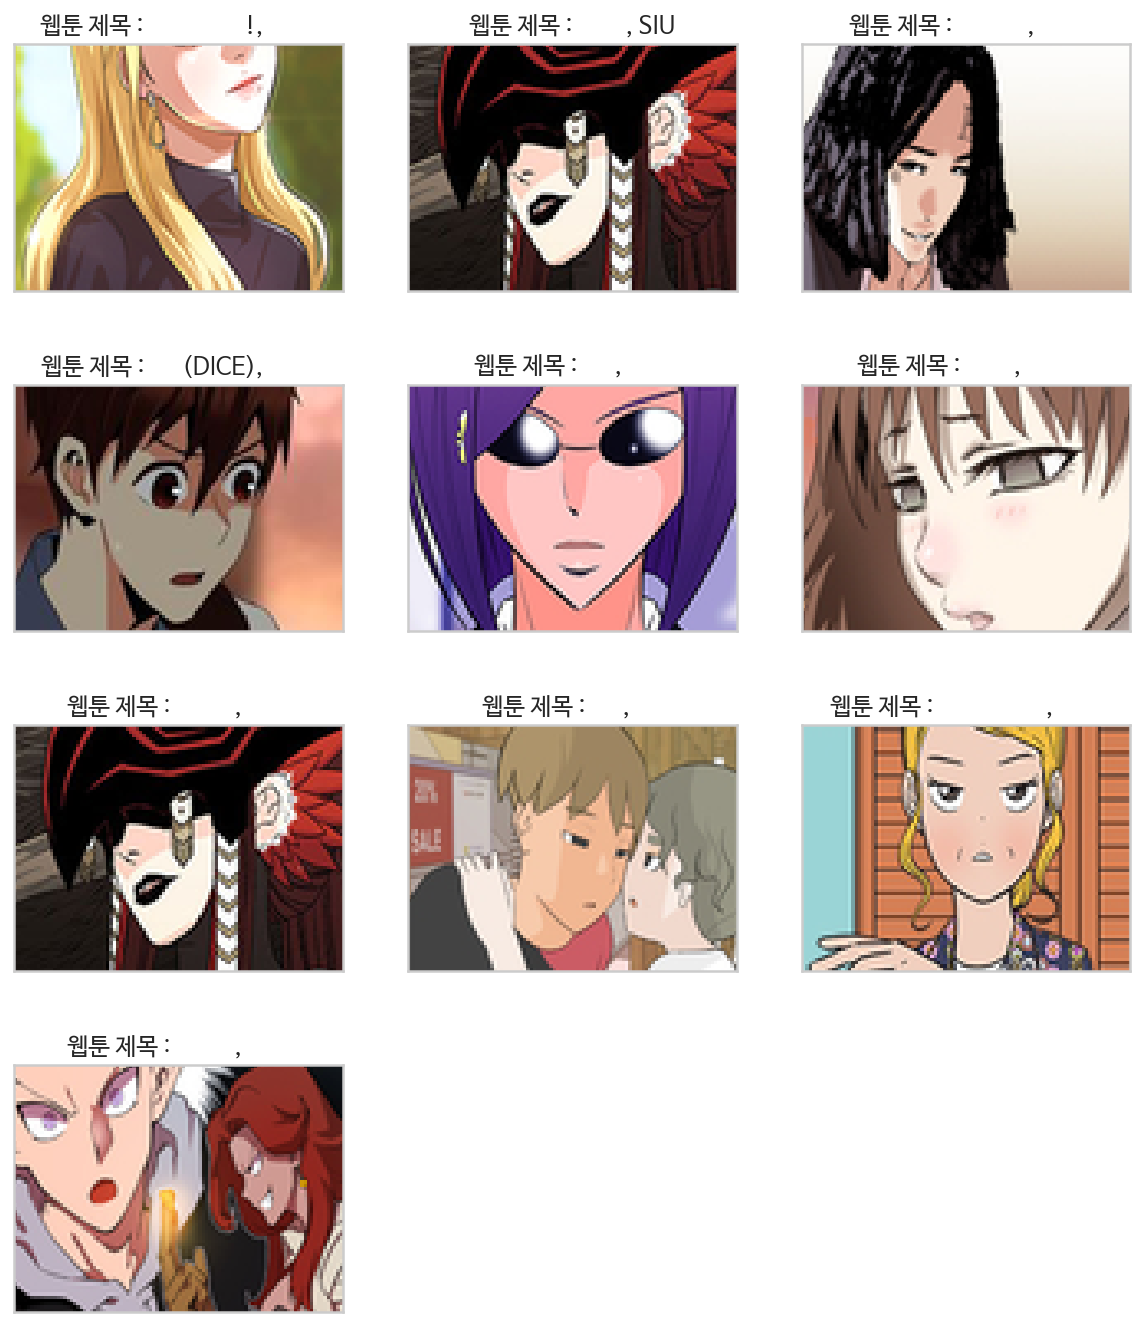

In [161]:
# proba기준 유사한 상위 10개웹툰 나열 --------------------------

i = 0

plt.figure(figsize=(10,12))
for each_path in top10_path_list:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  info = str(title_list[i])
  plt.title('웹툰 제목 : ' + str(title_list[i]), fontsize='medium')
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()